# Turbodbc

Turbodbc is a Python module to access relational databases via the Open Database Connectivity (ODBC) interface. 


- The database prepares the result set and exposes it to the ODBC driver using either row-wise or column-wise storage.
- Turbodbc has the ODBC driver write chunks of the result set into columnar buffers.
- These buffers are exposed to turbodbc’s Apache Arrow frontend. This frontend will create an Arrow table and fill in the buffered values.
- The previous steps are repeated until the entire result set is retrieved.

Turbodbc is routinely tested with MySQL, PostgreSQL, EXASOL, and MSSQL, but probably also works with your database.

Turbodbc is free to use (MIT license), open source (GitHub), works with Python 2.7 and Python 3.5+, and is available for Linux, OSX, and Windows.

[Refer](https://turbodbc.readthedocs.io/en/latest/)

In [107]:
# Importing libraries

import pandas as pd

from datetime import datetime
import pyodbc

import turbodbc
from turbodbc import connect

In [108]:
# Library version

print(f'Pandas version - {pd.__version__}')
print(f'pyodbc version - {pyodbc.version}')
print(f'turbodbc version - {turbodbc.__version__}')

Pandas version - 0.25.3
pyodbc version - 4.0.27
turbodbc version - 3.3.0


In [109]:
# Configuration details

SERVER_NAME = '<SERVERNAME>'
DATABASE_NAME = '<DATABASENAME>'
DRIVER_NAME = 'ODBC Driver 17 for SQL Server'

USER = '<USERNAME>'
PASSWORD = '<PASSWORD>'

SQL_QUERY = 'SELECT * FROM bhav_copy'

# Connection string sample
# f'DRIVER={DRIVER_NAME};SERVER={SERVER_NAME};DATABASE={DATABASE_NAME};Trusted_Connection=yes'

sql_auth_con_str = f'Driver={DRIVER_NAME};Server={SERVER_NAME};Port=5432;Database={DATABASE_NAME};Uid={USER};Pwd={PASSWORD};'
wind_auth_con_str = f'DRIVER={DRIVER_NAME};SERVER={SERVER_NAME};DATABASE={DATABASE_NAME};Trusted_Connection=yes'

In [110]:
# Execution time function

def execution_time(bf, at):
    print(f'Before Execution - {bf}')
    print(f'After Execution  - {at}')
    print(f'Execution time   - {at-bf}')
    return at-bf

In [111]:
# Reading data from SQL server 

# Connecting via pyodbc connection in Pandas (Windows Auth)

db_conn = pyodbc.connect(wind_auth_con_str)

bf_time = datetime.now()
py_odbc_df = pd.read_sql(SQL_QUERY, db_conn)
at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)

print(f'DB connection object - {db_conn}')

Before Execution - 2020-04-26 20:28:36.075908
After Execution  - 2020-04-26 20:32:22.847157
Execution time   - 0:03:46.771249
DB connection object - <pyodbc.Connection object at 0x0000024B121C3ED0>


In [112]:
# Type of py_odbc_df

type(py_odbc_df)

pandas.core.frame.DataFrame

In [113]:
# Info of py_odbc_df

py_odbc_df.info(memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981156 entries, 0 to 2981155
Data columns (total 16 columns):
id                    2981156 non-null int64
symbol                2981156 non-null object
series                2981156 non-null object
open                  2981156 non-null float64
high                  2981156 non-null float64
low                   2981156 non-null float64
close                 2981156 non-null float64
last                  2981156 non-null float64
prevclose             2981156 non-null float64
tottrdqty             2981156 non-null float64
tottrdval             2981150 non-null float64
script_date           2981156 non-null object
totaltrades           2981156 non-null float64
isin                  2981151 non-null object
value_close_prev      2981156 non-null float64
precent_close_prev    2981156 non-null float64
dtypes: float64(11), int64(1), object(4)
memory usage: 934.0 MB


In [92]:
# Connecting via Turbodbc. Read as apache arrow and convert to Pandas dataframe (SQL Auth)

bf_time = datetime.now()

connection = connect(connection_string=sql_auth_con_str)
cursor = connection.cursor()

cursor.execute(SQL_QUERY)
table = cursor.fetchallarrow()

turbo_sql_auth_df = table.to_pandas()

at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)

print(f'DB connection object - {connection}')

Before Execution - 2020-04-26 20:19:38.442314
After Execution  - 2020-04-26 20:20:13.315020
Execution time   - 0:00:34.872706
DB connection object - <turbodbc.connection.Connection object at 0x0000024AE4A7F4C8>


In [93]:
# Type of table

type(table)

pyarrow.lib.Table

In [94]:
# type of turbo_sql_auth_df

type(turbo_sql_auth_df)

pandas.core.frame.DataFrame

In [95]:
# Info of turbo_sql_auth_df

turbo_sql_auth_df.info(memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981156 entries, 0 to 2981155
Data columns (total 16 columns):
id                    2981156 non-null int64
symbol                2981156 non-null object
series                2981156 non-null object
open                  2981156 non-null float64
high                  2981156 non-null float64
low                   2981156 non-null float64
close                 2981156 non-null float64
last                  2981156 non-null float64
prevclose             2981156 non-null float64
tottrdqty             2981156 non-null float64
tottrdval             2981150 non-null float64
script_date           2981156 non-null object
totaltrades           2981156 non-null float64
isin                  2981151 non-null object
value_close_prev      2981156 non-null float64
precent_close_prev    2981156 non-null float64
dtypes: float64(11), int64(1), object(4)
memory usage: 934.0 MB


In [96]:
# Connecting via Turbodbc. Read as apache arrow and convert to Pandas dataframe (Windows Auth)

bf_time = datetime.now()

connection = connect(connection_string=wind_auth_con_str)
cursor = connection.cursor()

cursor.execute(SQL_QUERY)
table = cursor.fetchallarrow()

turbo_wind_auth_df = table.to_pandas()

at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)

print(f'DB connection object - {connection}')

Before Execution - 2020-04-26 20:20:29.331326
After Execution  - 2020-04-26 20:21:04.571084
Execution time   - 0:00:35.239758
DB connection object - <turbodbc.connection.Connection object at 0x0000024AE5584AC8>


In [97]:
# Info of turbo_sql_auth_df

turbo_wind_auth_df.info(memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981156 entries, 0 to 2981155
Data columns (total 16 columns):
id                    2981156 non-null int64
symbol                2981156 non-null object
series                2981156 non-null object
open                  2981156 non-null float64
high                  2981156 non-null float64
low                   2981156 non-null float64
close                 2981156 non-null float64
last                  2981156 non-null float64
prevclose             2981156 non-null float64
tottrdqty             2981156 non-null float64
tottrdval             2981150 non-null float64
script_date           2981156 non-null object
totaltrades           2981156 non-null float64
isin                  2981151 non-null object
value_close_prev      2981156 non-null float64
precent_close_prev    2981156 non-null float64
dtypes: float64(11), int64(1), object(4)
memory usage: 934.0 MB


In [98]:
# Connecting via Turbodbc. But not converting to apache arrow. Used Turbodbc connection in pandas (Windows Auth)

bf_time = datetime.now()
connection = connect(connection_string=wind_auth_con_str)
turbo_without_arrow_df = pd.read_sql(SQL_QUERY, connection)

at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)

print(f'DB connection object - {connection}')

Before Execution - 2020-04-26 20:21:20.568495
After Execution  - 2020-04-26 20:23:18.464174
Execution time   - 0:01:57.895679
DB connection object - <turbodbc.connection.Connection object at 0x0000024AE46AD0C8>


In [99]:
# Info of turbo_without_arrow_df

turbo_without_arrow_df.info(memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981156 entries, 0 to 2981155
Data columns (total 16 columns):
id                    2981156 non-null int64
symbol                2981156 non-null object
series                2981156 non-null object
open                  2981156 non-null float64
high                  2981156 non-null float64
low                   2981156 non-null float64
close                 2981156 non-null float64
last                  2981156 non-null float64
prevclose             2981156 non-null float64
tottrdqty             2981156 non-null float64
tottrdval             2981150 non-null float64
script_date           2981156 non-null object
totaltrades           2981156 non-null float64
isin                  2981151 non-null object
value_close_prev      2981156 non-null float64
precent_close_prev    2981156 non-null float64
dtypes: float64(11), int64(1), object(4)
memory usage: 934.0 MB


## Arrow advanced support


**Performance Optimisation**

- strings_as_dictionary - retrieve all string columns as Arrow DictionaryArray (split into two arrays - unique string values and integer, equals to pandas.Categorical).
- adaptive_integers - return the integer columns as the minimal possible integer storage type. 

In [100]:
# Connecting via Turbodbc. Read as apache arrow and convert to Pandas dataframe (Windows Auth) - Memory optimisation

bf_time = datetime.now()

connection = connect(connection_string=wind_auth_con_str)
cursor = connection.cursor()

cursor.execute(SQL_QUERY)
table = cursor.fetchallarrow(strings_as_dictionary=True, adaptive_integers=True)

turbo_wind_auth_df = table.to_pandas()

at_time = datetime.now()
ex_time = execution_time(bf_time, at_time)

print(f'DB connection object - {connection}')

turbo_wind_auth_df.info(memory_usage='deep', null_counts=True)

Before Execution - 2020-04-26 20:23:36.129650
After Execution  - 2020-04-26 20:24:11.102550
Execution time   - 0:00:34.972900
DB connection object - <turbodbc.connection.Connection object at 0x0000024AD1AD33C8>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981156 entries, 0 to 2981155
Data columns (total 16 columns):
id                    2981156 non-null int32
symbol                2981156 non-null category
series                2981156 non-null category
open                  2981156 non-null float64
high                  2981156 non-null float64
low                   2981156 non-null float64
close                 2981156 non-null float64
last                  2981156 non-null float64
prevclose             2981156 non-null float64
tottrdqty             2981156 non-null float64
tottrdval             2981150 non-null float64
script_date           2981156 non-null object
totaltrades           2981156 non-null float64
isin                  2981151 non-null category
value_close_prev  

## Result set in batches

By default, turbodbc fetches results in batches of 20 MB

- read_buffer_size in make_options = turbodbc.Megabytes(100) 100 MB or
- read_buffer_size in make_options = turbodbc.Rows(100000) 100000 Rows

In [101]:
# Connecting via Turbodbc. Read as apache arrow and convert to Pandas dataframe (Windows Auth) - Batch reading

SQL_QUERY = 'SELECT TOP 1000000 * FROM bhav_copy '

connection = connect(connection_string=wind_auth_con_str)
cursor = connection.cursor()

cursor.execute(SQL_QUERY)
batches = cursor.fetcharrowbatches()

for batch in batches:
    print(batch.to_pandas().shape, batch.to_pandas()['id'].min())


(36921, 16) 1
(36921, 16) 36922
(36921, 16) 73843
(36921, 16) 110764
(36921, 16) 147685
(36921, 16) 184606
(36921, 16) 221527
(36921, 16) 258448
(36921, 16) 295369
(36921, 16) 332290
(36921, 16) 369211
(36921, 16) 406132
(36921, 16) 443053
(36921, 16) 479974
(36921, 16) 516895
(36921, 16) 553816
(36921, 16) 590737
(36921, 16) 627658
(36921, 16) 664579
(36921, 16) 701500
(36921, 16) 738421
(36921, 16) 775342
(36921, 16) 812263
(36921, 16) 849184
(36921, 16) 886105
(36921, 16) 923026
(36921, 16) 959947
(3133, 16) 996868


In [102]:
# Connecting via Turbodbc. Read as apache arrow and convert to Pandas dataframe (Windows Auth) - Batch reading

options = turbodbc.make_options(read_buffer_size=turbodbc.Megabytes(100))

SQL_QUERY = 'SELECT TOP 1000000 * FROM bhav_copy '

connection = connect(connection_string=wind_auth_con_str, turbodbc_options=options)
cursor = connection.cursor()

cursor.execute(SQL_QUERY)
batches = cursor.fetcharrowbatches()

for batch in batches:
    print(batch.to_pandas().shape, batch.to_pandas()['id'].min())


(184608, 16) 1
(184608, 16) 184609
(184608, 16) 369217
(184608, 16) 553825
(184608, 16) 738433
(76960, 16) 923041


In [104]:
# Connecting via Turbodbc. Read as apache arrow and convert to Pandas dataframe (Windows Auth) - Batch reading

options = turbodbc.make_options(read_buffer_size=turbodbc.Rows(100000))

SQL_QUERY = 'SELECT TOP 1000000 * FROM bhav_copy '

connection = connect(connection_string=wind_auth_con_str, turbodbc_options=options)
cursor = connection.cursor()

cursor.execute(SQL_QUERY)
batches = cursor.fetcharrowbatches()

for batch in batches:
    print(batch.to_pandas().shape, batch.to_pandas()['id'].min())


(100000, 16) 1
(100000, 16) 100001
(100000, 16) 200001
(100000, 16) 300001
(100000, 16) 400001
(100000, 16) 500001
(100000, 16) 600001
(100000, 16) 700001
(100000, 16) 800001
(100000, 16) 900001


## Conculsion

Short answer: turbodbc is faster.

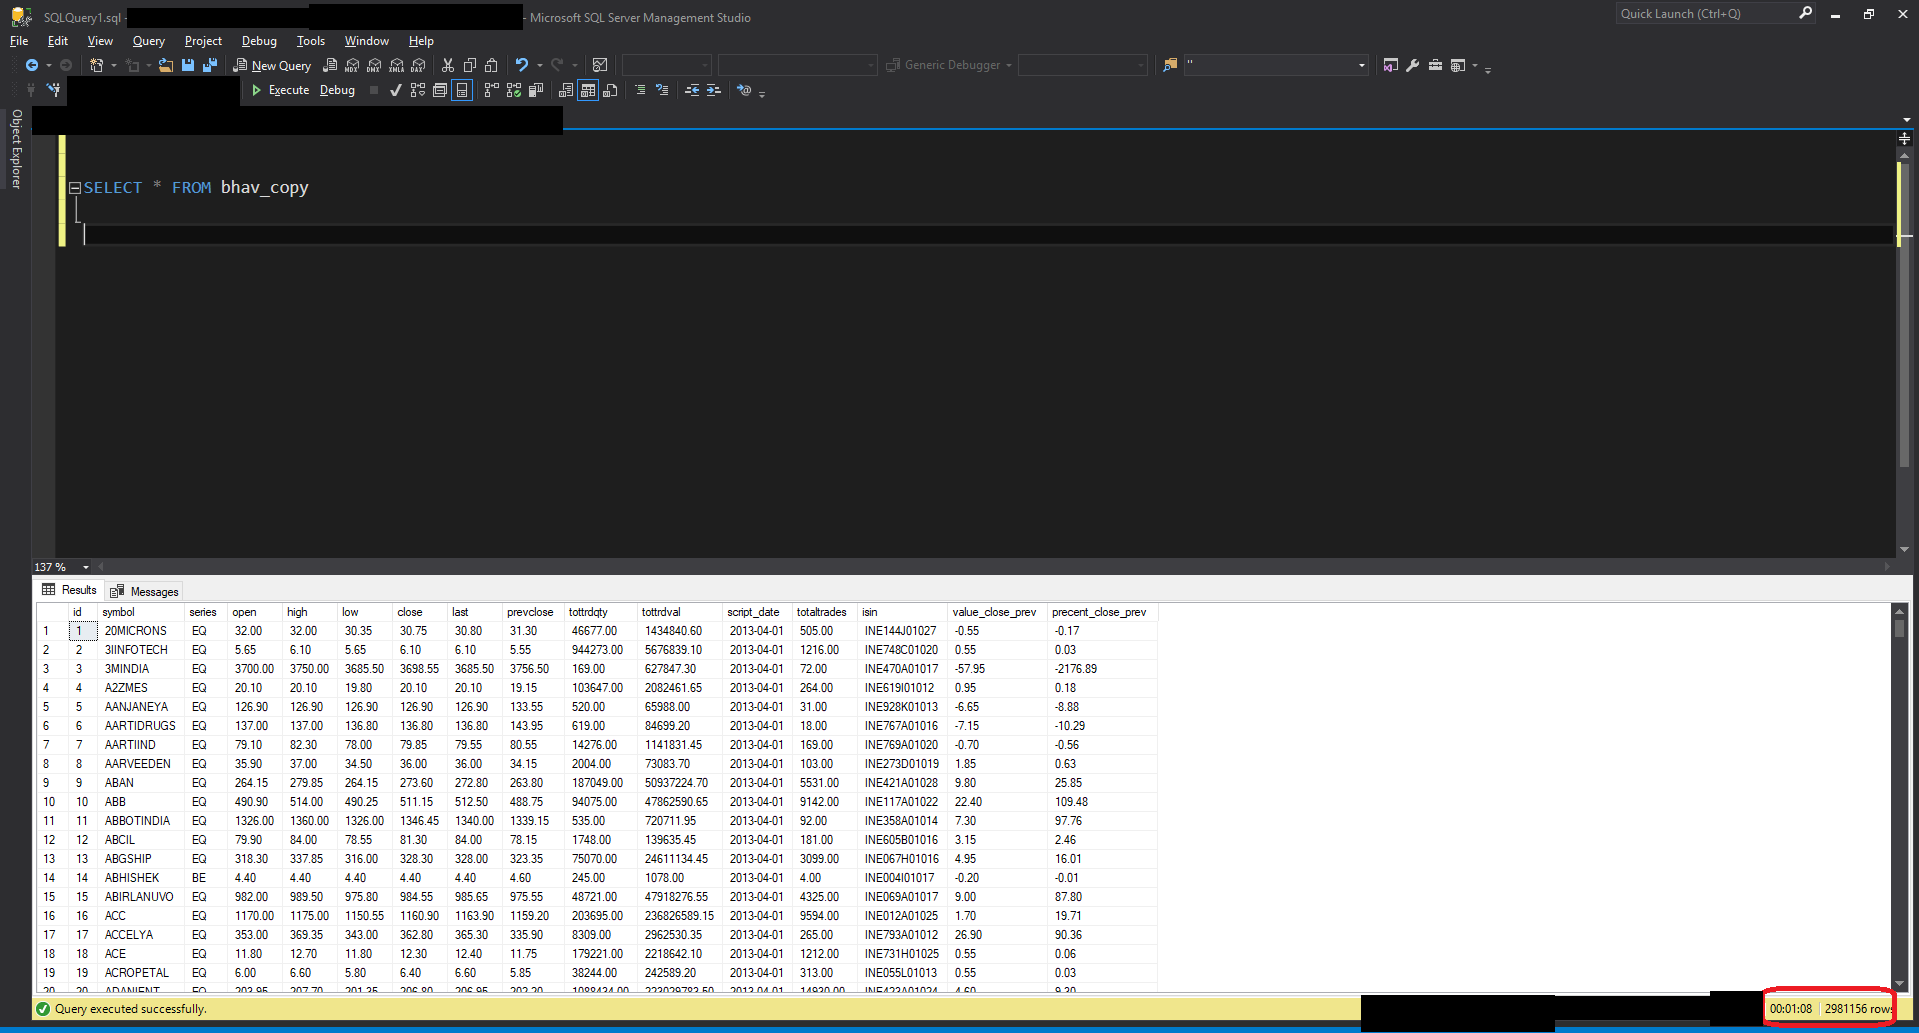

## Execution time

In SQL SERVER Management Studio - 01:08 (Approx 1 min to 1 min 20 secs)

Connected via Pyodc connection in pandas function - 03:50 (Approx 3 to 4 mins) 

Connected via Turbodbc connection, read as apache arrow and converted to pandas - 00:36 (Approx 36 to 40 secs)

Connected via Turbodbc connection in pandas function - 01:15 (Approx 1 min to 1 min 20 secs)


Total number of records = 2,981,156 (2.9 Million)

Memory usage of pandas dataframe = 934 MB


**Laptop configuration**:

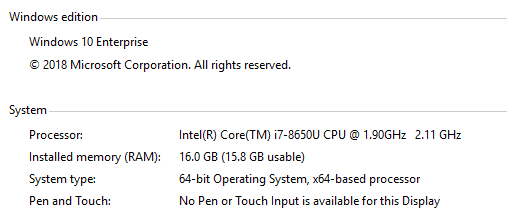


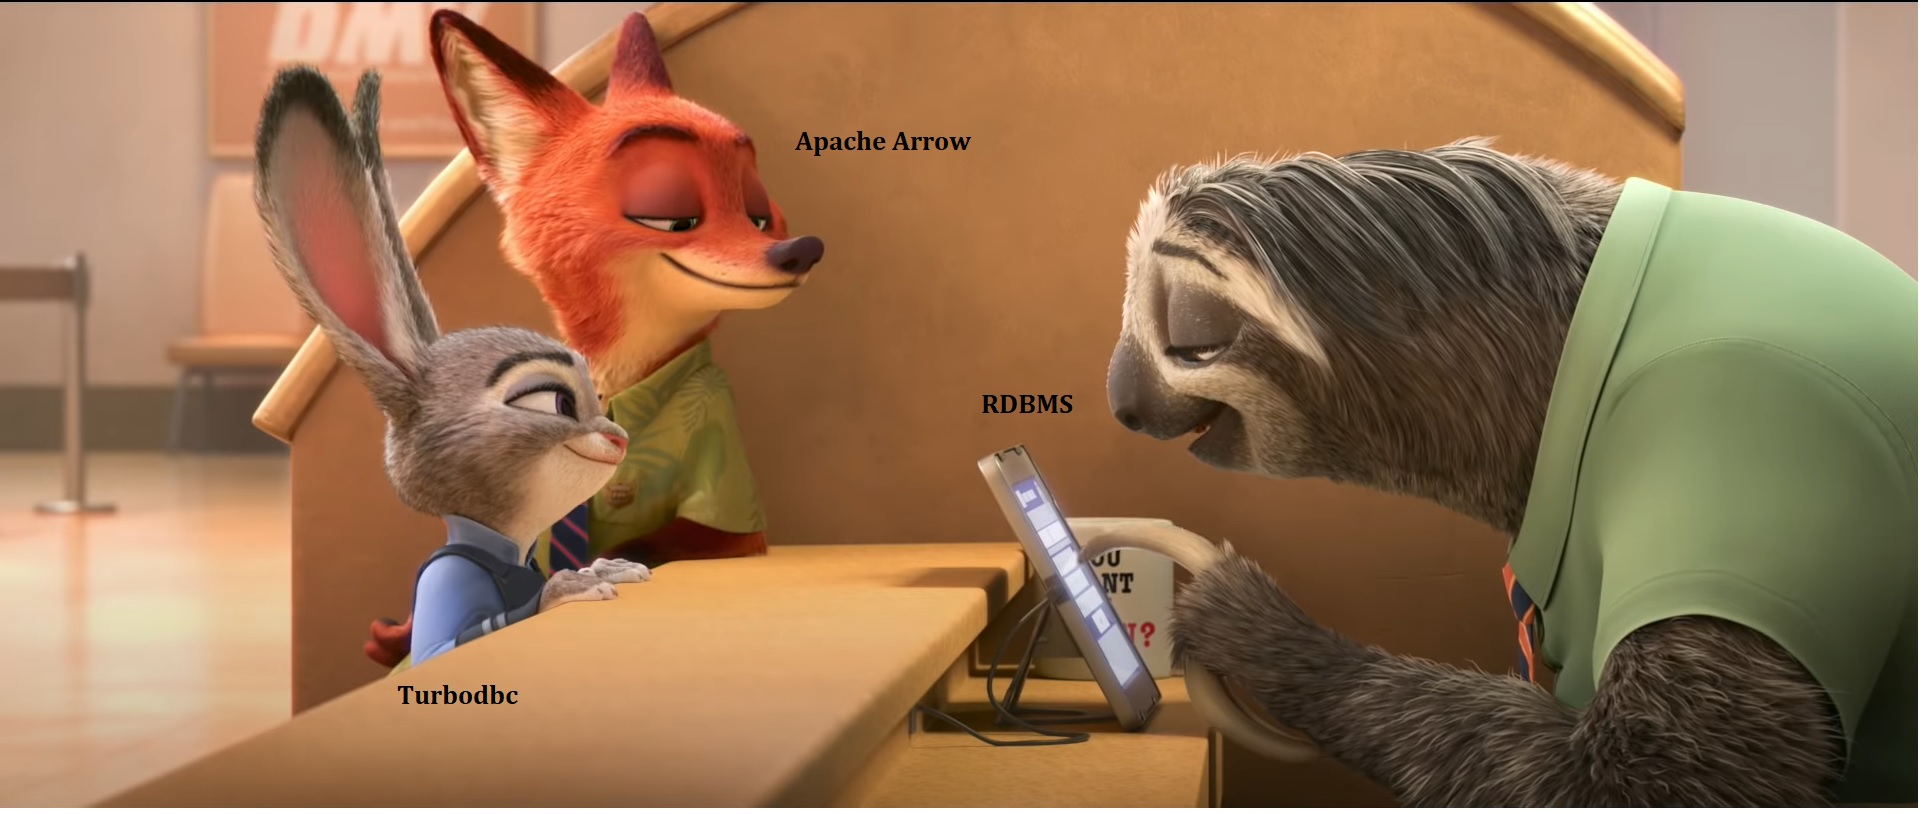